<a href="/adiag321/Customer-Segmentation-and-Analysis-of-Online-Retail/blob/main/Online_retail_Combine_Segmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentaion of online retail customers
## Part III - Combine Segmentations

## Introduction
In this notebook wecombine the two customer segmentations of online retail customers dataset ( [Online Retail II Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) from UC Irvine Machine Learning Repository)

Specifiacally, we combine
* Customer [segmentation by category](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_buying_category.ipynb) of bought items description and
* Customer [segmentation by RFM and country](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_RFM_Country.ipynb).

## Loading libraries and results of segmentations


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [4]:
customer_spending_per_category=pd.read_pickle('/Users/adityaagarwal/Aditya Ag/Jupyter Notebook/Resume Projects/Customer Segmentation and Analysis of Online Retail/customer_segments_buying_categories.pickle')
customer_spending_per_category.head()

category,Customer ID,0,1,2,3,cluster
0,12346.0,0.841716,0.000000,0.158284,0.000000,1
1,12347.0,0.853972,0.101290,0.004168,0.040569,1
2,12348.0,0.910270,0.000000,0.046648,0.043082,1
3,12349.0,0.924907,0.008446,0.002316,0.064331,1
4,12350.0,0.938995,0.061005,0.000000,0.000000,1


In [5]:
customer_RFM_GDP=pd.read_pickle('/Users/adityaagarwal/Aditya Ag/Jupyter Notebook/Resume Projects/Customer Segmentation and Analysis of Online Retail/customer_segments_RFM_country.pickle')
customer_RFM_GDP.head()

,recency,frequency,monetary_value,weighted GDP,cluster
Customer ID,,,,,
12346.0,325,42.647059,-3.804706,2638296.0,3
12347.0,1,50.375000,704.165000,20805.0,1
12348.0,74,87.400000,403.880000,267856.0,1
12349.0,18,147.000000,880.908000,1848222.0,0
12350.0,309,309.000000,334.400000,366386.0,1


As said in [Part I](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_buying_category.ipynb), clustering based on categories spending resulted infour clusters with all of them having a high percentage of spending in category 0. In addition:
* cluster 0 has customers with high spending in category 2,
* cluster 1 has high spending only in category 0,
* cluster 2 has customers with high spending in category 3,
* cluster 3 has customers with high spending in category 1.



category Customer ID         0         1         2         3
               count    median    median    median    median
cluster                                                     
0                421  0.670152  0.007819  0.228504  0.043079
1               4287  0.892189  0.015741  0.001038  0.031568
2                807  0.672202  0.005246  0.017402  0.246114
3                427  0.534162  0.362365  0.000000  0.009505




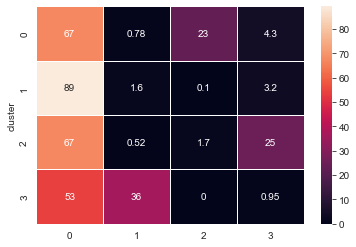

In [9]:
def cluster_profile(customer_spending_per_category):
  ''' profile clusters '''
  customer_clusters=customer_spending_per_category.groupby(['cluster']).agg({'Customer ID':['count'], 
                                                         0:'median',
                                                         1:'median',
                                                         2:'median',
                                                         3:'median'})
  print(customer_clusters)
  print('\n')
  customer_clusters=customer_clusters.drop([('Customer ID', 'count')],1)
  customer_clusters.columns=[0,1,2,3]
  
  customer_clusters[0]=100*customer_clusters[0]
  customer_clusters[1]=100*customer_clusters[1]
  customer_clusters[2]=100*customer_clusters[2]
  customer_clusters[3]=100*customer_clusters[3]
  

  sns.heatmap(customer_clusters, annot=True,  linewidths=.5)

cluster_profile(customer_spending_per_category)

In [10]:
customer_spending_per_category['cluster'].value_counts()

1    4287
2     807
3     427
0     421
Name: cluster, dtype: int64

As for RFM-Country clustering from [Part II](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_RFM_Country.ipynb), we have four major clusters that can be ranked by RFM score (from best to to worst) as:

cluster 4 > cluster 0 > cluster 5 > cluster 2

and that cluster 5 has customers from countries with lower GDP than the rest.
Thus, we will keep these four clusters plus one more into which we will merge the rest.

        Customer ID recency   frequency monetary_value weighted GDP
              count  median      median         median       median
cluster                                                            
0              3545    34.0   58.636364      243.88020    2638296.0
1               246    78.5   92.062500      393.26817     503416.0
3              1547   389.0  227.000000      205.25000    2638296.0
5               577   619.0  602.000000      167.16000    2638296.0


        Customer ID    recency  frequency monetary_value weighted GDP
              count     median     median         median       median
cluster                                                              
0              3545   3.034360   5.985142      24.157117    31.339994
1               246   7.005801   9.397020      38.954476     5.980017
3              1547  34.716644  23.170385      20.330672    31.339994
5               577  55.243195  61.447453      16.557735    31.339994


HEAT map
Numbers are column pe

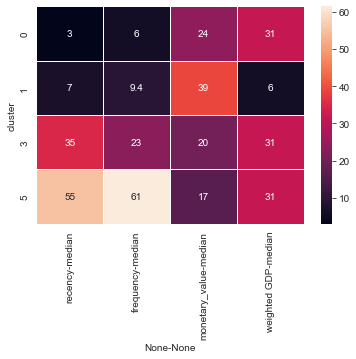

In [11]:
def cluster_profile_RFM_country(customer_clustering,cut_off=0):
  ''' profile clusters with size equal or bigger than cut_off'''

  customer_clusters=customer_clustering.reset_index().groupby(['cluster']).agg({'Customer ID':['count'], 
                                                         'recency':'median',
                                                         'frequency':'median',
                                                         'monetary_value':'median',
                                                         'weighted GDP':'median'})
  idx= customer_clusters['Customer ID']>=cut_off
  idx=idx['count'].to_list()
  customer_clusters=customer_clusters[idx]
  print(customer_clusters)
  print('\n')
  customer_clusters_sum=customer_clusters.sum(axis=0)
  #print(customer_clusters_sum)
  customer_clusters['monetary_value']=100*customer_clusters['monetary_value']/customer_clusters_sum['monetary_value']
  customer_clusters['frequency']=100*customer_clusters['frequency']/customer_clusters_sum['frequency']
  customer_clusters['recency']=100*customer_clusters['recency']/customer_clusters_sum['recency']
  customer_clusters['weighted GDP']=100*customer_clusters['weighted GDP']/customer_clusters_sum['weighted GDP']
  print(customer_clusters)
  print('\n')
  
  print('HEAT map')
  print('Numbers are column percentages')
  sns.heatmap(customer_clusters.drop(['Customer ID'],axis=1), annot=True,  linewidths=.5)
cluster_profile_RFM_country(customer_RFM_GDP,cut_off=100)

In [16]:
customer_RFM_GDP['cluster'].value_counts()

0    3545
3    1547
5     577
1     246
6      17
2       9
4       1
Name: cluster, dtype: int64

In [17]:
customer_RFM_GDP['RFM_country_cluster']=5
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==4,'RFM_country_cluster']=1
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==0,'RFM_country_cluster']=2
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==5,'RFM_country_cluster']=3
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==2,'RFM_country_cluster']=4
customer_RFM_GDP['RFM_country_cluster'].value_counts()

2    3545
5    1810
3     577
4       9
1       1
Name: RFM_country_cluster, dtype: int64

In [18]:
customer_RFM_GDP=customer_RFM_GDP.reset_index()
customer_RFM_GDP=customer_RFM_GDP[['Customer ID','RFM_country_cluster']]
print(customer_RFM_GDP.shape)
customer_spending_per_category=customer_spending_per_category[['Customer ID','cluster']]
customer_spending_per_category.columns=['Customer ID','item_category_cluster']
print(customer_spending_per_category.shape)
customer_clusters=pd.merge(customer_RFM_GDP,customer_spending_per_category)
print(customer_clusters.shape)
customer_clusters.head()

(5942, 2)
(5942, 2)
(5942, 3)


,Customer ID,RFM_country_cluster,item_category_cluster
0,12346.0,5,1
1,12347.0,5,1
2,12348.0,5,1
3,12349.0,2,1
4,12350.0,5,1


In [19]:
pd.crosstab(customer_clusters['RFM_country_cluster'],customer_clusters['item_category_cluster'])

item_category_cluster,0,1,2,3
RFM_country_cluster,,,,
1,0,1,0,0
2,289,2497,489,270
3,15,451,69,42
4,0,6,0,3
5,117,1332,249,112


In [20]:
cross_table=pd.crosstab(customer_clusters['RFM_country_cluster'],customer_clusters['item_category_cluster'])/5942*100
cross_table

item_category_cluster,0,1,2,3
RFM_country_cluster,,,,
1,0.000000,0.016829,0.000000,0.000000
2,4.863682,42.022888,8.229552,4.543925
3,0.252440,7.590037,1.161225,0.706833
4,0.000000,0.100976,0.000000,0.050488
5,1.969034,22.416695,4.190508,1.884887


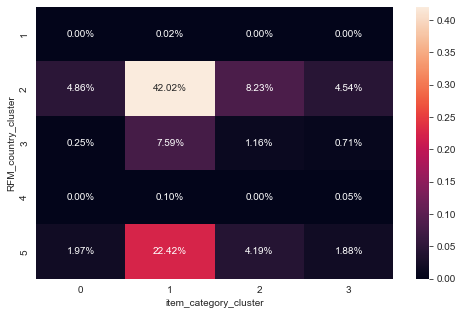

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cross_table/100,
                annot=True,
                fmt='.2%',
                #cmap='rocket_r',
                #linewidths=.5,
                ax=ax)
plt.show()